# Random Forest Regression

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [12]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Predicting a new result

In [14]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

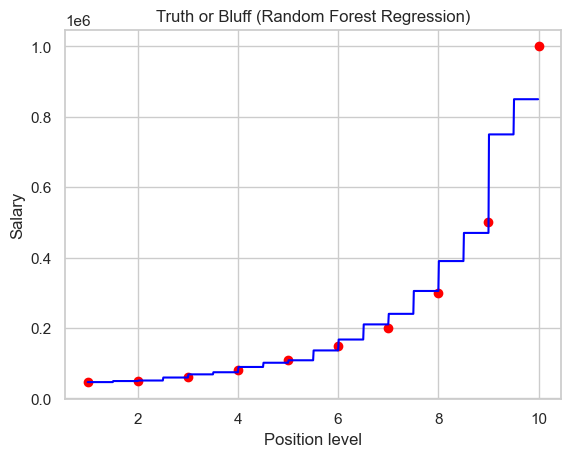

In [15]:
X_grid = np.arange(X.min(), X.max(), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Advanced visualization: per-tree predictions and uncertainty band


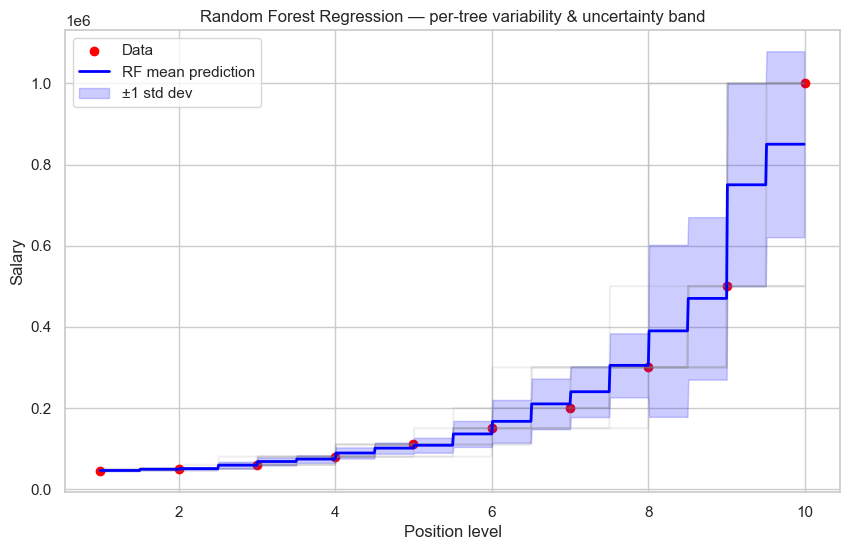

In [16]:
import seaborn as sns
sns.set_theme(style='whitegrid')

# High-resolution grid (same as before)
X_grid = np.arange(X.min(), X.max(), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Collect predictions from each tree in the forest
all_preds = np.array([est.predict(X_grid) for est in regressor.estimators_])  # shape: (n_estimators, n_points)
mean_pred = all_preds.mean(axis=0)
std_pred = all_preds.std(axis=0)

plt.figure(figsize=(10,6))
# Data points
plt.scatter(X.ravel(), y, color='red', label='Data')
# Individual tree predictions (light)
for i in range(all_preds.shape[0]):
    plt.plot(X_grid.ravel(), all_preds[i], color='gray', alpha=0.12)
# Mean prediction
plt.plot(X_grid.ravel(), mean_pred, color='blue', linewidth=2, label='RF mean prediction')
# Uncertainty band (±1 std dev)
plt.fill_between(X_grid.ravel(), mean_pred - std_pred, mean_pred + std_pred, color='blue', alpha=0.2, label='±1 std dev')
plt.title('Random Forest Regression — per-tree variability & uncertainty band')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()